# Clustering K-Means Dengan Python
Istilah “klaster (cluster)” mempunyai pengertian secara bahasa sebagai kumpulan, kelompok, himpunan, atau gabungan dari sebuah obyek tertentu yang mempunyai kemiripan karakteristik tertentu.

## Latihan 1
Import Library yang dibutuhkan

In [17]:
# Import library Pandas
import pandas as pd

# Import library Numpy
import numpy as np

# Import library Matplotlib
import matplotlib.pyplot as plt
# Import library Seaborn
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Ubah lokasi file sesuai dengan lokasi Dataset di komputer individu
df = pd.read_csv('Iris_AfterClean.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.6,3.1,1.5,0.2,Iris-setosa
1,5.0,3.6,1.4,0.2,Iris-setosa
2,5.4,3.9,1.7,0.4,Iris-setosa
3,4.9,3.1,1.5,0.1,Iris-setosa
4,5.4,3.7,1.5,0.2,Iris-setosa


In [19]:
# Membuang kolom yang tidak diperlukan 'Species'
df_new = df.drop(axis=1,columns='Species')
df_new


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.6,3.1,1.5,0.2
1,5.0,3.6,1.4,0.2
2,5.4,3.9,1.7,0.4
3,4.9,3.1,1.5,0.1
4,5.4,3.7,1.5,0.2
...,...,...,...,...
135,6.7,3.0,5.2,2.3
136,6.3,2.5,5.0,1.9
137,6.5,3.0,5.2,2.0
138,6.2,3.4,5.4,2.3


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

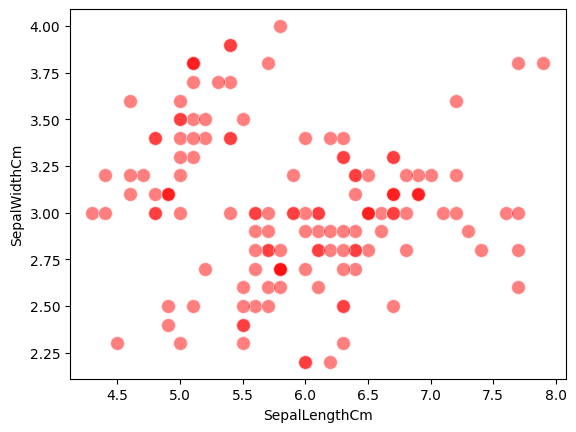

In [20]:
# Membuat scatterplot dari SepalLengthCm dan SepalWidthCm.
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, s=100, color='red', alpha = 0.5)

## Latihan 2
Lakukan visualisasi Scatter plot untuk kolom <code>'PetalLengthCm'</code> dan	<code>'PetalWidthCm'</code>

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

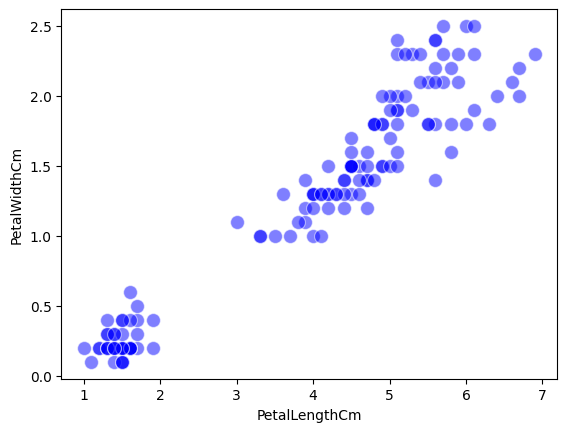

In [21]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, s=100, color='blue', alpha = 0.5)

In [22]:
# menentukan data yang akan dikluster, yaitu data dengan variabel SepalLengthCm dan SepalWidthCm
df_x = df.iloc[:, 0:2]
df_x.head()

,SepalLengthCm,SepalWidthCm
0,4.6,3.1
1,5.0,3.6
2,5.4,3.9
3,4.9,3.1
4,5.4,3.7


## Latihan 3
Ubah DataFrame <code>df_x</code> menjadi sebuah Array!

In [23]:
# mengubah variabel data frame yang akan dikluster menjadi array.
x_array = np.array(df_x)
print(x_array)

[[4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]
 [6.1 3. ]
 [5.8 2.6]
 [5.  2.3]
 [5.6 2.7]
 [5.7 3. ]
 [5.7 2.9]
 [6.2 2.9]
 [5.1 2.5]
 [5.7 2.8]
 [6.3 3.3]

<details><summary>Klik di sini untuk solusinya</summary>

``` python
x_array = np.array(df_x)
print(x_array)
```

In [24]:
# menyamakan skala data atau menstandarisasi data dengan menggunakan sintaks berikut.
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.08333333, 0.5       ],
       [0.19444444, 0.77777778],
       [0.30555556, 0.94444444],
       [0.16666667, 0.5       ],
       [0.30555556, 0.83333333],
       [0.13888889, 0.66666667],
       [0.13888889, 0.44444444],
       [0.        , 0.44444444],
       [0.41666667, 1.        ],
       [0.30555556, 0.94444444],
       [0.22222222, 0.72222222],
       [0.38888889, 0.88888889],
       [0.22222222, 0.88888889],
       [0.30555556, 0.66666667],
       [0.22222222, 0.83333333],
       [0.08333333, 0.77777778],
       [0.22222222, 0.61111111],
       [0.13888889, 0.66666667],
       [0.19444444, 0.44444444],
       [0.19444444, 0.66666667],
       [0.25      , 0.72222222],
       [0.25      , 0.66666667],
       [0.11111111, 0.55555556],
       [0.13888889, 0.5       ],
       [0.30555556, 0.66666667],
       [0.16666667, 0.5       ],
       [0.19444444, 0.55555556],
       [0.33333333, 0.72222222],
       [0.16666667, 0.5       ],
       [0.02777778, 0.44444444],
       [0.

## Latihan 4
Konfigurasikan parameter Kmeans dengan <b>jumlah cluster = 3</b> dan <b>tingkat random = 100</b>

In [25]:
# menentukan dan mengkonfigurasi fungsi kmeansnya
kmeans = KMeans(n_clusters = 3, random_state=100)

In [26]:
kmeans.fit(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=100)

In [27]:
# menampilkan pusat kluster
print(kmeans.cluster_centers_)

[[0.20596206 0.67344173]
 [0.42495127 0.26803119]
 [0.70634921 0.51322751]]


In [28]:
df_x['kluster'] = kmeans.labels_
df_x.head()

,SepalLengthCm,SepalWidthCm,kluster
0,4.6,3.1,0
1,5.0,3.6,0
2,5.4,3.9,0
3,4.9,3.1,0
4,5.4,3.7,0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


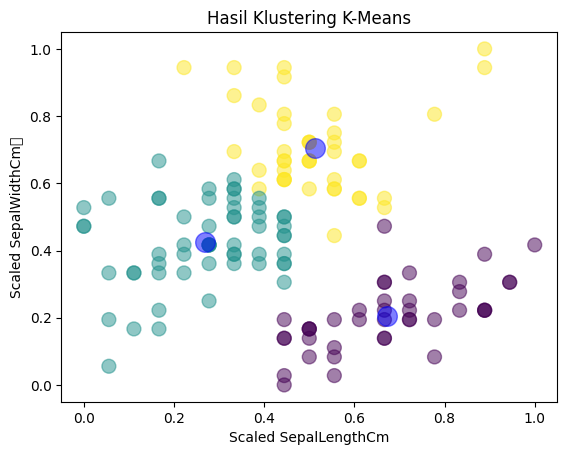

In [29]:
fig, ax = plt.subplots()
sct = plt.scatter(x_scaled[:,1], x_scaled[:,0], s = 100,
c = df_x.kluster, marker = 'o', alpha = 0.5,
label = df_x.kluster)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,0], c='blue', s=200, alpha=0.5);
plt.title('Hasil Klustering K-Means')
plt.xlabel('Scaled SepalLengthCm')
plt.ylabel('Scaled SepalWidthCm	')
plt.show()

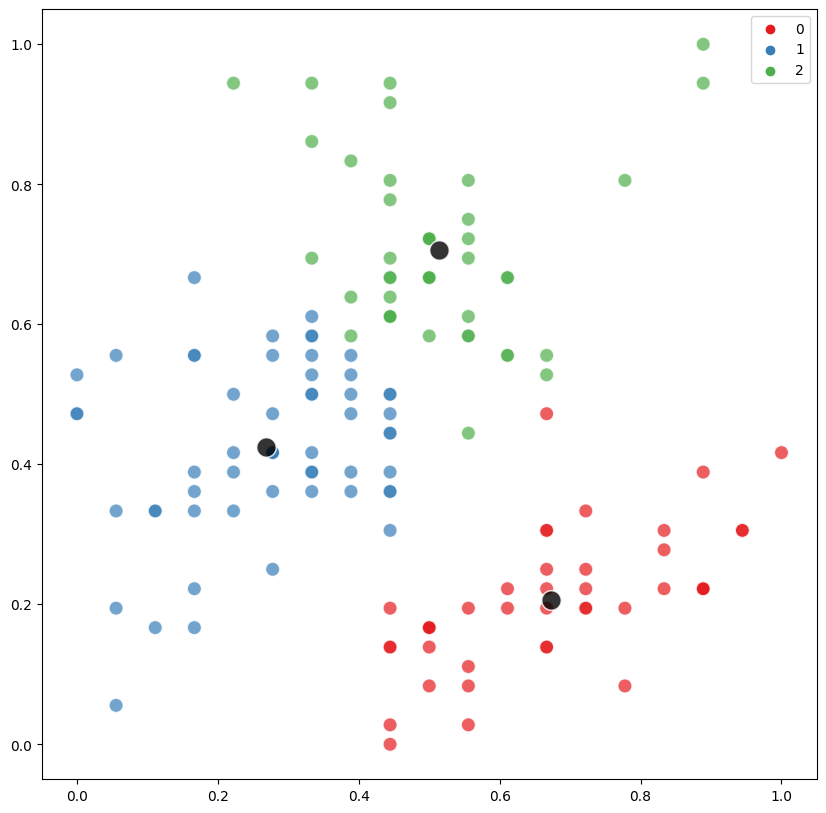

In [30]:
# Menampilkan hasil kluster dalam bentuk plot dengan tambahan legend dan dalam betuk yang lebih bagus.
plt.figure(figsize=[10, 10])
sns.scatterplot(x=x_scaled[:, 1], y=x_scaled[:, 0], hue=df_x['kluster'], palette='Set1', s=100, alpha=0.7)
sns.scatterplot(x=centers[:, 1], y=centers[:, 0], color='k', s=200, alpha=0.8)
plt.show()

In [31]:
"Selesai"

'Selesai'